In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from mpl_toolkits import mplot3d
from scipy import interpolate as inp

In [2]:
test_array = np.arange(-10, 10, 1)
print(test_array)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]


In [6]:
test_exp = np.power(10.0, test_array)
print(test_exp)

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09]


In [2]:
frequencies_1D = np.loadtxt("./2Genotypes4000Gen.txt", delimiter = "\t")

In [3]:
print(frequencies_1D.shape)


(4001, 1000)


[0.85439 0.85351 0.85457 ... 0.88209 0.88256 0.88285]


Text(0, 0.5, 'genotype 1 frequency')

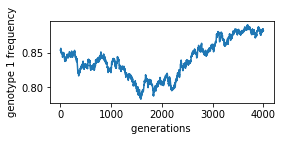

In [4]:
t = np.arange(0, frequencies_1D.shape[0], 1)

frequencies_test = frequencies_1D[:,0]
print(frequencies_test)

fig = plt.figure(figsize=(4,1.5))
plt.plot(t, frequencies_test)
plt.xlabel("generations ")
plt.ylabel("genotype 1 frequency")


In [5]:
porig_50 = np.loadtxt("./analysis/data/porig_50.txt", delimiter = "\t")
porig_100 = np.loadtxt("./analysis/data/porig_100.txt", delimiter = "\t")
porig_150 = np.loadtxt("./analysis/data/porig_150.txt", delimiter = "\t")

pcd_50 = np.loadtxt("./analysis/data/pcd_50.txt", delimiter = "\t")
pcd_100 = np.loadtxt("./analysis/data/pcd_100.txt", delimiter = "\t")
pcd_150 = np.loadtxt("./analysis/data/pcd_150.txt", delimiter = "\t")

historig_50 = np.array(np.loadtxt('./analysis/data/historig_50.txt',delimiter='\t'))
historig_100 = np.array(np.loadtxt('./analysis/data/historig_100.txt',delimiter='\t'))
historig_150 = np.array(np.loadtxt('./analysis/data/historig_150.txt',delimiter='\t'))

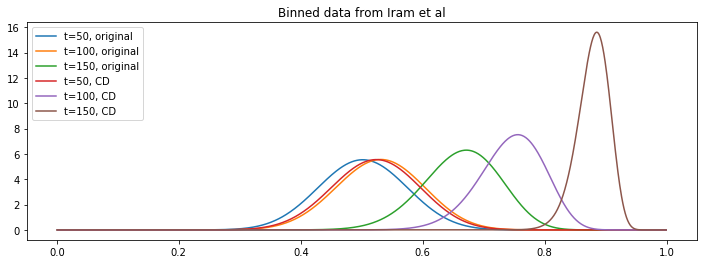

In [6]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(111)
ax1.set_title("Binned data from Iram et al")
ax1.plot(porig_50[:,0], porig_50[:,1], label = "t=50, original")
ax1.plot(porig_100[:,0], porig_100[:,1], label = "t=100, original")
ax1.plot(porig_150[:,0], porig_150[:,1], label = "t=150, original")
ax1.plot(pcd_50[:,0], pcd_50[:,1], label = "t=50, CD")
ax1.plot(pcd_100[:,0], pcd_100[:,1], label = "t=100, CD")
ax1.plot(pcd_150[:,0], pcd_150[:,1], label = "t=150, CD")

ax1.legend()
#plt.savefig("BinnedDataTwoGenotypeModel.png")

Text(0.5, 1.0, 'Genotype frequency distributions for 2-genotype model')

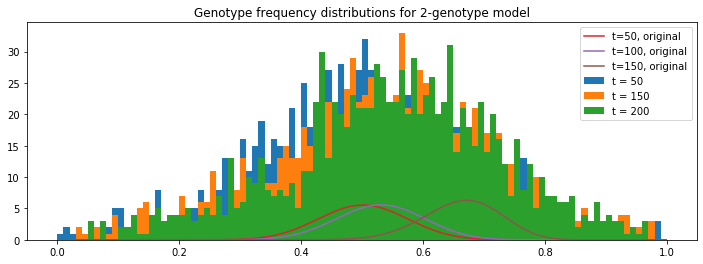

In [7]:
bins = np.arange(0, 1, .01)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(111)
n, bins, patches = ax1.hist(frequencies_1D[1000], bins, label = "t = 50")
n2, bins2, patches2 = ax1.hist(frequencies_1D[3000], bins, label = "t = 150")
n3, bins3, patches3 = ax1.hist(frequencies_1D[4000], bins, label = "t = 200" )
ax1.plot(porig_50[:,0], porig_50[:,1], label = "t=50, original")
ax1.plot(porig_100[:,0], porig_100[:,1], label = "t=100, original")
ax1.plot(porig_150[:,0], porig_150[:,1], label = "t=150, original")
#ax1.hist(frequencies_1D[100], bins,label = "t = 100")
#ax1.hist(frequencies_1D[150], bins,label = "t = 150")
#ax1.hist(frequencies_1D[500], bins, label = "t = 500")
ax1.legend()
ax1.set_title("Genotype frequency distributions for 2-genotype model")

#fig = plt.figure(figsize=(12,4))
#ax1 = fig.add_subplot(111)
#ax1.hist(frequencies_1D[3000], bins, label = "t = 50")
#plt.savefig("Genotype frequency distributions for 2-genotype model.png")

9/19/20: I got the original non-vectorized(?) 2D model code from Shamreen as well as the raw data she used to plot the curves for the 2D model in the paper (find them in the ProdRuns folder in this directory). Below I'm going to try to plot that data as above and see if it looks more like the paper figure. 

In [8]:
#Read in the raw data files from the original nonvectorized C code. Then check that the sizes of the NumPy arrays are correct.
 
popAsVar_nonVectorized = np.loadtxt("./ProdRuns/popAsVarUnVectorized.txt", delimiter = "\t")
popAsVar_nonVectorized_CD = np.loadtxt("./ProdRuns/popAsVarCDUnVectorized.txt", delimiter = "\t")

print(np.shape(popAsVar_nonVectorized))
print(np.shape(popAsVar_nonVectorized_CD))

(10001, 1000)
(10001, 1000)


[0.0125 0.0375 0.0625 0.0875 0.1125 0.1375 0.1625 0.1875 0.2125 0.2375
 0.2625 0.2875 0.3125 0.3375 0.3625 0.3875 0.4125 0.4375 0.4625 0.4875
 0.5125 0.5375 0.5625 0.5875 0.6125 0.6375 0.6625 0.6875 0.7125 0.7375
 0.7625 0.7875 0.8125 0.8375 0.8625 0.8875 0.9125 0.9375 0.9625 0.9875]


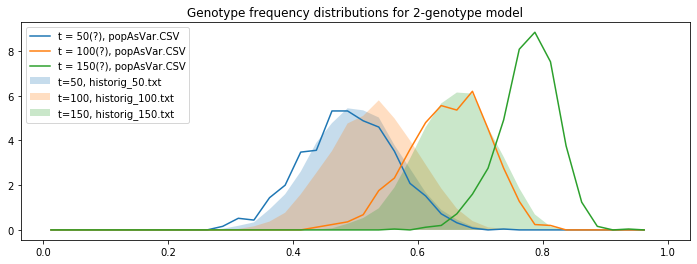

In [85]:
#Plot the output as histograms as above. 

bins = np.arange(.0125, 1, .025)
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(111)

gen50, bins = np.histogram(popAsVar_nonVectorized[1000], bins)
gen150, bins = np.histogram(popAsVar_nonVectorized[3000], bins)
gen200, bins = np.histogram(popAsVar_nonVectorized[4000], bins)

ax1.plot(bins[:-1], gen50*.04, label = "t = 50(?), popAsVar.CSV")
ax1.plot(bins[:-1], gen150*.04, label = "t = 100(?), popAsVar.CSV")
ax1.plot(bins[:-1], gen200*.04, label = "t = 150(?), popAsVar.CSV")

#n, bins, patches = ax1.hist(popAsVar_nonVectorized[1000], bins, label = "t = 50")
#n2, bins2, patches2 = ax1.hist(popAsVar_nonVectorized[3000], bins, label = "t = 150")
#n3, bins3, patches3 = ax1.hist(popAsVar_nonVectorized[4000], bins, label = "t = 200" )
ax1.fill_between(historig_50[:,0], historig_50[:,1], label = "t=50, historig_50.txt", alpha = .25)
ax1.fill_between(historig_100[:,0], historig_100[:,1], label = "t=100, historig_100.txt", alpha = .25)
ax1.fill_between(historig_150[:,0], historig_150[:,1], label = "t=150, historig_150.txt", alpha = .25)
#ax1.hist(frequencies_1D[100], bins,label = "t = 100")
#ax1.hist(frequencies_1D[150], bins,label = "t = 150")
#ax1.hist(frequencies_1D[500], bins, label = "t = 500")
ax1.legend()
ax1.set_title("Genotype frequency distributions for 2-genotype model")

plt.savefig("Comparing popAsVar.csv to historig_N.png")


In [42]:
psim_50, bins = np.histogram(popAsVar_nonVectorized[1000], bins)

hist_unvectorized_50 = np.vstack((bins[:-1], psim_50, ))

hist_unvectorized_50 = np.transpose(hist_unvectorized_50)

np.savetxt("hist_unvectorized_50.txt", hist_unvectorized_50, delimiter = "\t")

I'll also try to find a suitable model for growth rate as a function of temperature to interpolate with. Zwiettering et al. recommend something they call the Ratkowsky 3 model:

$$u_m(T) = [b_3(T-T_{min})]^2 -\{1-\exp[c_3(T-T_{max})]\}$$

where $u_m$ is the growth rate, $T_{min}$ is the minimum temperature at which growth is observed, $T_{max}$ is the maximum temperature at which growth is observed, and $b_3$ and $c_3$ are fitted constants. 


In [132]:
temperatures = np.arange(0, 50, 1)

Tmin = 3.99
Tmax = 43.7
b3 = .0410
c3 = .161

T = 40
print((b3*(T-Tmin))**(2) - (1-np.e**(c3-T-Tmax)))

def Ratkowsky3(T, Tmin = 3.99, Tmax = 43.7, b3 = .0410, c3 = .161):
    
    muM = np.power(b3*(T-Tmin), 2)*(1-np.power(np.e, (c3*(T-Tmax))))
    
    for i in range(len(muM)):
        if (muM[i] < 0):
            muM[i] = 0
    return muM

def Ratkowsky3_1value(T, Tmin = 3.99, Tmax = 43.7, b3 = .0410, c3 = .161):
    
    muM = np.power(b3*(T-Tmin), 2)*(1-np.power(np.e, (c3*(T-Tmax))))
    if (muM < 0):
        muM = 0
    return muM

def Ratkowsky4(T, b4 = 8.46, c4 = 1.25, T_Amax = 43.1):
    A = b4*(1-np.power(np.e, c4*(T-T_Amax)))
    return A

def Lambda(T, p = 23.9, q = 2.28):
    
    lagtime = np.power(np.e, p/(T-q))
    return lagtime

def growthrate(T):
    general_growthrate = Ratkowsky3(T)+Ratkowsky4(T)
    print(general_growthrate)
    for i in range(len(general_growthrate)):
        if (general_growthrate[i] < 0):
            general_growthrate[i] = 0
            
    return general_growthrate

def A(T, b4 = 8.46, c4 = 1.25, T_Amax = 43.1):
    
    asymptote = b4*(1-np.power(np.e, c4*(T-T_Amax)))
    
    return asymptote






1.1797864881


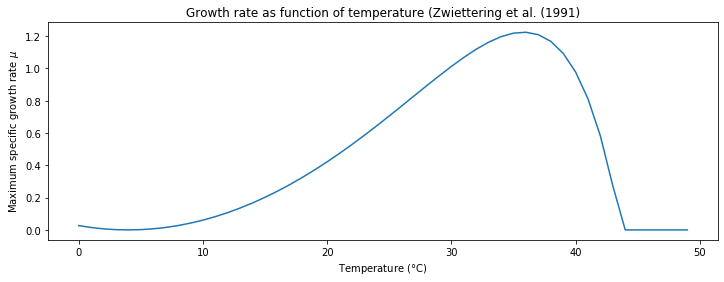

In [133]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(111)

#ax1.plot(temperatures, muT(T = temperatures))
#ax1.plot(temperatures, asymptote(T = temperatures))
#ax1.plot(temperatures, lagtime(T = temperatures))
ax1.plot(temperatures, Ratkowsky3(T = temperatures))
ax1.set_xlabel("Temperature ($\degree$C)")
ax1.set_ylabel("Maximum specific growth rate $\mu$")
ax1.set_title("Growth rate as function of temperature (Zwiettering et al. (1991)")
fig.savefig("growthrate vs temperature.png")


[11.3       5.65      2.        0.175     0.09      0.015635]
[11.3       5.65      2.        0.175     0.09      0.015635]


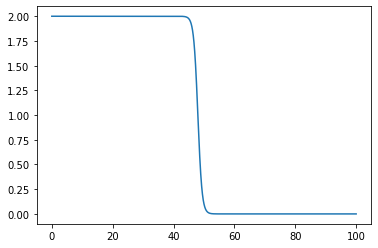

In [321]:
tempData = np.loadtxt("../weinreich_temp_modifiedlabels.csv", delimiter = ",", skiprows=1)

MICs = tempData[0, 1:]

print(MICs)
def growthrate_conc(MIC, g_drugless, concentration, c = -.6824968):
    growthrate = g_drugless/(1+19*np.e**((MIC-concentration)/c))
    return growthrate
    
concentrations = np.arange(0, 100, .01)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(concentrations, growthrate_conc(g_drugless = 2, MIC = 50, concentration = concentrations))
#fig.savefig("representative 2D growth curve.png")

print(MICs_1)



Text(0.5, 0.92, 'Growth rate as function of temperature and drug concentration')

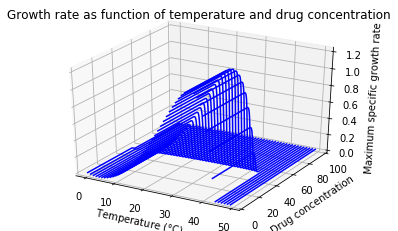

In [322]:
fig = plt.figure()
ax = plt.axes(projection='3d')

for i in range(len(temperatures)):
    xs = temperatures[i]*np.ones(len(concentrations))
    ys = concentrations
    zs = growthrate_conc(g_drugless = Ratkowsky3_1value(temperatures[i]), MIC = 50, concentration = concentrations)
    ax.plot3D(xs, ys, zs, color = "blue")
ax.set_ylim(0,100)
ax.set_xlabel("Temperature ($\degree$C)")
ax.set_ylabel("Drug concentration")
ax.set_zlabel("Maximum specific growth rate")
ax.set_title("Growth rate as function of temperature and drug concentration")
#fig.savefig("growth rate as function of concentration at different temperatures.png")

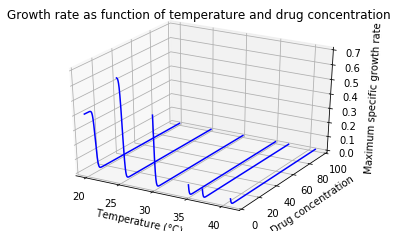

In [323]:
fig = plt.figure()
ax = plt.axes(projection='3d')

temperatures_exp = [20, 25, 30, 35, 37, 41]

for i in range(len(temperatures_exp)):
    xs = temperatures_exp[i]*np.ones(len(concentrations))
    ys = concentrations
    zs = growthrate_conc(g_drugless = Ratkowsky3_1value(temperatures_exp[i]), MIC = MICs_1[i], concentration = concentrations)
    ax.plot3D(xs, ys, zs, color = "blue")
ax.set_ylim(0,100)
ax.set_xlabel("Temperature ($\degree$C)")
ax.set_ylabel("Drug concentration")
ax.set_zlabel("Maximum specific growth rate")
ax.set_title("Growth rate as function of temperature and drug concentration")
fig.savefig("1_growth rate with measured temperatures.png")

In [324]:
## for interpolation I need a set of (growthrate(T, conc)) values 
random_temps_concs = (np.random.choice(temperatures_exp, 1000), np.random.choice(concentrations, 1000))
random_temps_concs = np.transpose(random_temps_concs) 
#random_temps_concs[:, 0] *= 50
#random_temps_concs[:, 1] *= 100

print(np.shape(random_temps_concs))


(1000, 2)


In [325]:
def MIC_function(T):
    if (T == 20):
        return 11.3
    if (T == 25):
        return 5.65
    if (T == 30):
        return 2
    if (T == 35):
        return .175
    if (T == 37):
        return .09
    if (T == 41):
        return .015635

random_growthrates = []
for i in range(1000):
    growthrate_fromrandom = growthrate_conc(MIC= MIC_function(random_temps_concs[i, 0]), g_drugless = Ratkowsky3_1value(random_temps_concs[i, 0]), concentration = random_temps_concs[i, 1])
    random_growthrates.append(growthrate_fromrandom)

random_growthrates = np.array(random_growthrates)

print(random_growthrates.shape)

(1000,)


Text(0.5, 0.92, 'growth rates as function of temperature and concentration')

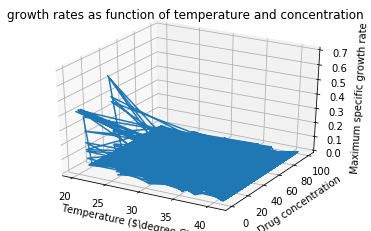

In [326]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(random_temps_concs[:, 0], random_temps_concs[:, 1], random_growthrates)
ax.set_xlabel("Temperature ($\degree C)")
ax.set_ylabel("Drug concentration")
ax.set_zlabel("Maximum specific growth rate") 
ax.set_title("growth rates as function of temperature and concentration")

#fig.savefig("Random growth rate as function of T and drug.png")

In [327]:

temps_for_grid = np.linspace(0,50,50)
concs_for_grid =  np.linspace(0, 100,100)
temps, concs = np.meshgrid(temps_for_grid, concs_for_grid)
grid_values = inp.griddata(random_temps_concs, random_growthrates, (temps, concs), method='cubic')

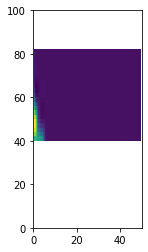

In [328]:
plt.imshow(grid_values.T, extent=(0,50,0,100), origin='lower')

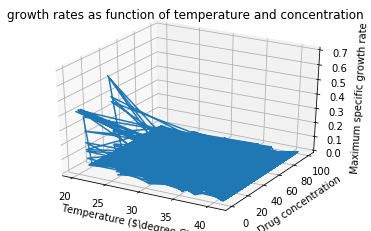

In [329]:
fig

No handles with labels found to put in legend.


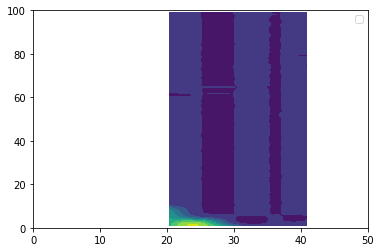

In [330]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.contourf(temps, concs, grid_values)
ax1.legend()

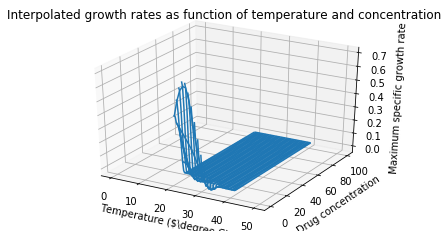

In [331]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(temps, concs, grid_values)
ax.set_xlabel("Temperature ($\degree C)")
ax.set_ylabel("Drug concentration")
ax.set_zlabel("Maximum specific growth rate") 
ax.set_title("Interpolated growth rates as function of temperature and concentration")
fig.savefig("Interpolated 3D growth rates.png")

In [173]:
points = np.random.rand(1000, 2)
print(points)

[[0.84382756 0.33540982]
 [0.01514283 0.40013707]
 [0.44241912 0.38731562]
 ...
 [0.89615374 0.03114359]
 [0.01560615 0.19041107]
 [0.95635066 0.6994403 ]]


In [285]:
MICs_31 = tempData[30, 1:]
print(MICs_31)

[32.015 16.01  45.3    1.     0.705  0.5  ]


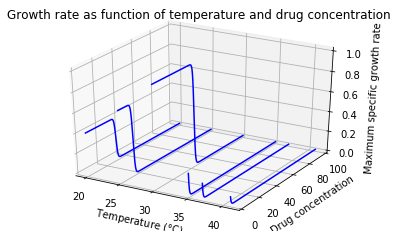

In [286]:
fig = plt.figure()
ax = plt.axes(projection='3d')

temperatures_exp = [20, 25, 30, 35, 37, 41]

for i in range(len(temperatures_exp)):
    xs = temperatures_exp[i]*np.ones(len(concentrations))
    ys = concentrations
    zs = growthrate_conc(g_drugless = Ratkowsky3_1value(temperatures_exp[i]), MIC = MICs_31[i], concentration = concentrations)
    ax.plot3D(xs, ys, zs, color = "blue")
ax.set_ylim(0,100)
ax.set_xlabel("Temperature ($\degree$C)")
ax.set_ylabel("Drug concentration")
ax.set_zlabel("Maximum specific growth rate")
ax.set_title("Growth rate as function of temperature and drug concentration")
fig.savefig("31growth rate with measured temperatures.png")

In [289]:
def MIC_function(T):
    if (T == 20):
        return 32.015
    if (T == 25):
        return 16.01
    if (T == 30):
        return 45.3
    if (T == 35):
        return 1
    if (T == 37):
        return .705
    if (T == 41):
        return .5

random_growthrates = []
for i in range(1000):
    growthrate_fromrandom = growthrate_conc(MIC= MIC_function(random_temps_concs[i, 0]), g_drugless = Ratkowsky3_1value(random_temps_concs[i, 0]), concentration = random_temps_concs[i, 1])
    random_growthrates.append(growthrate_fromrandom)

random_growthrates = np.array(random_growthrates)

print(random_growthrates.shape)

(1000,)


Text(0.5, 0.92, 'growth rates as function of temperature and concentration')

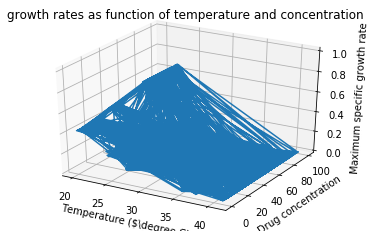

In [290]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(random_temps_concs[:, 0], random_temps_concs[:, 1], random_growthrates)
ax.set_xlabel("Temperature ($\degree C)")
ax.set_ylabel("Drug concentration")
ax.set_zlabel("Maximum specific growth rate") 
ax.set_title("growth rates as function of temperature and concentration")

#fig.savefig("Random growth rate as function of T and drug.png")

In [291]:

temps_for_grid = np.linspace(0,50,50)
concs_for_grid =  np.linspace(0, 100,100)
temps, concs = np.meshgrid(temps_for_grid, concs_for_grid)
grid_values_31 = inp.griddata(random_temps_concs, random_growthrates, (temps, concs), method='cubic')

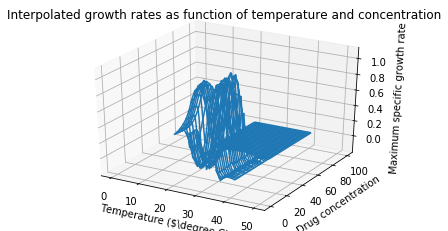

In [316]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(temps, concs, grid_values_31)
ax.set_xlabel("Temperature ($\degree C)")
ax.set_ylabel("Drug concentration")
ax.set_zlabel("Maximum specific growth rate") 
ax.set_title("Interpolated growth rates as function of temperature and concentration")

   
fig.savefig("31_Interpolated 3D growth rates.png")

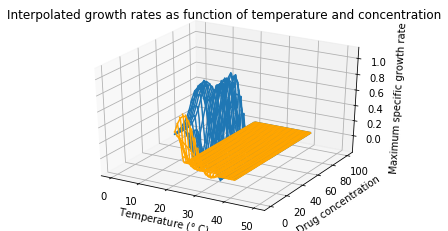

In [335]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(temps, concs, grid_values_31)
ax.plot_wireframe(temps, concs, grid_values, color = "orange")
ax.set_xlabel("Temperature ($\degree$ C)")
ax.set_ylabel("Drug concentration")
ax.set_zlabel("Maximum specific growth rate") 
ax.set_title("Interpolated growth rates as function of temperature and concentration")

fig.savefig("Comparing two fitness landscapes 00000 vs 11110).png")

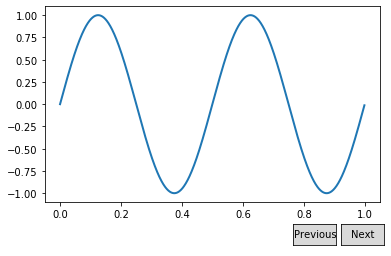

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)


class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

RuntimeError: matplotlib does not support generators as input

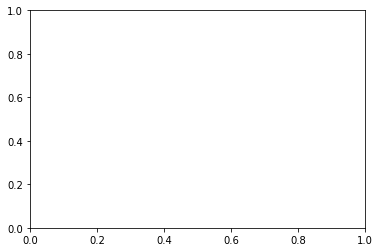

In [3]:
import scipy
from matplotlib import pyplot

DataRange = range(0, 360)
DataRange = map(scipy.deg2rad, DataRange)
Data1 = map(scipy.sin, DataRange)
Data2 = map(scipy.cos, DataRange)

toggle = True

def onclick(event):
    global toggle

    toggle = not toggle
    event.canvas.figure.clear()

    if toggle:
        event.canvas.figure.gca().plot(Data1)
    else:
        event.canvas.figure.gca().plot(Data2)

    event.canvas.draw()

fig = pyplot.figure()
fig.canvas.mpl_connect('button_press_event', onclick)

pyplot.plot(Data1)
pyplot.show()

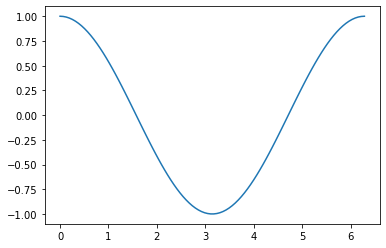

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# define your x and y arrays to be plotted
t = np.linspace(start=0, stop=2*np.pi, num=100)
y1 = np.cos(t)
y2 = np.sin(t)
y3 = np.tan(t)
plots = [(t,y1), (t,y2), (t,y3)]

# now the real code :) 
curr_pos = 0

def key_event(e):
    global curr_pos

    if e.key == "right":
        curr_pos = curr_pos + 1
    elif e.key == "left":
        curr_pos = curr_pos - 1
    else:
        return
    curr_pos = curr_pos % len(plots)

    ax.cla()
    ax.plot(plots[curr_pos][0], plots[curr_pos][1])
    fig.canvas.draw()

fig = plt.figure()
fig.canvas.mpl_connect('key_press_event', key_event)
ax = fig.add_subplot(111)
ax.plot(t,y1)
plt.show()